#THIAGO TANURE ANDOZIA

## DATA ANALYST CHALLENGE

### NAMASTE TECHNOLOGIES

#### 2020-08-13

**TASK 1**

In [1]:
# Libraries

%matplotlib inline
!pip install python-exchangeratesapi
import json as js
import pandas as pd
import numpy as np
import requests
import datetime
from exchangeratesapi import Api
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams

  Created wheel for python-exchangeratesapi: filename=python_exchangeratesapi-0.0.2-cp36-none-any.whl size=5372 sha256=e6d0cebd53d484b36248530b1ebd7ba418f486ba0d6198edc2851a9f9e693a95
  Stored in directory: /root/.cache/pip/wheels/c7/72/d9/22476c5944ddcef7e801299c3ad5d23dec0d946c43a2e04ef8
Successfully built python-exchangeratesapi


In [2]:
# Set the coin

coin_i_have = 'USD'
coin_i_want = 'CAD'

In [3]:
# Loading data

path = "https://raw.githubusercontent.com/namasteTechnologies/data-analyst-\
challenge/master/orders.json"

resp = requests.get(path)
df = js.loads(resp.text)

In [4]:
# Create a list with dates to consult the API

dates = []

for i in df:
  d = (i['created_at'][0:10])
  dates.append(d)

In [5]:
# Extracting day of week and changing (saturday or sunday to friday)
'''Also, 2020-01-01 was included since the API does not
shows the currency_rate of this holiday.'''

dates_ok = []

for i in dates:
  a = datetime.datetime.strptime(i, '%Y-%m-%d').weekday()
  if a == 5:
    date_time_obj = datetime.datetime.strptime(i, '%Y-%m-%d')
    day = datetime. timedelta(1)
    new_date = date_time_obj - day
    b = str(new_date)
    b = b[0:10]
    b
    dates_ok.append(b)
  elif a == 6:
    date_time_obj = datetime.datetime.strptime(i, '%Y-%m-%d')
    day = datetime. timedelta(2)
    new_date = date_time_obj - day
    b = str(new_date)
    b = b[0:10]
    b
    dates_ok.append(b)
  elif i == '2020-01-01':
    date_time_obj = datetime.datetime.strptime(i, '%Y-%m-%d')
    day = datetime. timedelta(1)
    new_date = date_time_obj - day
    b = str(new_date)
    b = b[0:10]
    b
    dates_ok.append(b)
  else:
    dates_ok.append(i)

In [6]:
# Connecting and geting the currency_rates

api = Api()

currency_rate = []

for i in dates_ok:
 temp = api.get_rates(coin_i_have, start_date= i, end_date= i)
 a = temp['rates'][i][coin_i_want]
 currency_rate.append(a)

In [7]:
# Union of date and rate

res = {}
for key in dates: 
    for value in currency_rate: 
        res[key] = value 
        currency_rate.remove(value) 
        break

In [8]:
# Inserting the rate in the orders list

for i in df:
  d = (i['created_at'][0:10])
  if d in res:
    i['currency_rate'] = res[d]

In [9]:
# Calculating the CAD price

for i in df:
  i['cad_price'] = (i['total_price'] * i['currency_rate'])

In [10]:
# Checking first order

df[0]

{'cad_price': 106.541996296631,
 'created_at': '2020-03-07T14:31:11Z',
 'currency_rate': 1.3420077629,
 'customer': {'email': 'william.doe@gmail.com',
  'id': 47178,
  'name': 'William Doe'},
 'id': 8369263756632563,
 'line_items': [{'id': 610448,
   'price': 29.4,
   'product_id': 632910392,
   'product_name': 'Purple Punch 2.0 Dried Flower',
   'product_sku': 'PPLEPUNCH20-05'},
  {'id': 997208,
   'price': 49.99,
   'product_id': 278266679,
   'product_name': "Grandpa's Stash Dried Flower",
   'product_sku': 'GPSTASH-01'}],
 'total_price': 79.39}

**TASK 2**

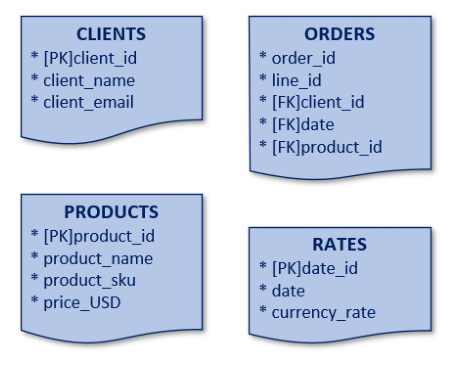

In [11]:
# Tables strucures
rcParams['figure.figsize'] = 8, 8
img=mpimg.imread('tables.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
# Create databases

conn = sqlite3.connect('SQLite_Namaste.db')
c = conn.cursor()

# Create tables:

# Clients
c.execute('''CREATE TABLE IF NOT EXISTS clients
             ([client_id] INTEGER PRIMARY KEY,\
             [client_name] text,\
             [client_email] text)''')

# Products
c.execute('''CREATE TABLE IF NOT EXISTS products
             ([product_id] INTEGER PRIMARY KEY,\
             [product_name] text,\
             [product_sku] text,\
             [price_USD] float)''')

# Rates
c.execute('''CREATE TABLE IF NOT EXISTS rates
             ([date_id] INTEGER PRIMARY KEY,\
             [date] datetime,\
             [currency_rate] float)''')

# Orders
c.execute('''CREATE TABLE IF NOT EXISTS orders
             ([order_id] integer,\
             [line_id] integer,\
             [client_id] integer,\
             [date] datetime,\
             [product_id] integer)''')

conn.commit()

!ls

sales_canada.png  sample_data  SQLite_Namaste.db  tables.png


In [13]:
# Function to help separate fields and subjects.
# It ill be used to populate unique tables.
# To subjects with one argument.

def unique(df, subject, field):

  global validation

  validation = []

  for i in df:
    temp = str(i[subject][field])
    validation.append(temp)

  return(validation)

In [14]:
# Function to help separate fields and subjects.
# It ill be used to populate unique tables.
# To subjects with more than one argument.

def unique2(df, subject, camp):

  global validation

  validation = []

  for i in df:
    camps = range(0,len(i[subject]))
    for j in camps:
      temp = str(i[subject][j][camp])
      validation.append(temp)

  return(validation)

In [15]:
# Seting unique to customers

list_column = ['id','name','email']
final_customers = []

for i in list_column:
  unique(df,'customer',i)

  globals()[str('validation_' + str(i))] = validation

final_customers = pd.DataFrame({'id':validation_id,\
                                'name':validation_name,\
                                'email':validation_email})

final_customers = final_customers.drop_duplicates()
final_customers = final_customers.to_dict('id')

In [16]:
# Insert customers data

try:
    sql_conn = sqlite3.connect('SQLite_Namaste.db')
    cursor = sql_conn.cursor()
    print("Successfully Connected")

    
    for i in final_customers:

      insert = "INSERT INTO clients\
      (client_id, client_name, client_email) VALUES ('" +\
      str(final_customers[i]['id']) + "','" +\
      str(final_customers[i]['name']) + "','" +\
      str(final_customers[i]['email']) + "')"

      count = cursor.execute(insert)
      sql_conn.commit()
      print("Record inserted successfully into table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data", error)
finally:
    if (sql_conn):
        sql_conn.close()
        print("Connection closed")

Successfully Connected
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Connection closed


In [17]:
# Seting unique to products

list_column = ['product_id','product_name','product_sku','price']
final_products = []

for i in list_column:
  unique2(df,'line_items',i)

  globals()[str('validation_' + str(i))] = validation

final_products = pd.DataFrame({'product_id':validation_product_id, \
                               'product_name':validation_product_name,\
                               'product_sku':validation_product_sku,\
                               'price':validation_price})

final_products = final_products.drop_duplicates()
final_products = final_products.reset_index(drop = True)
final_products = final_products.to_dict('id')

In [18]:
# Insert products data

try:
    sql_conn = sqlite3.connect('SQLite_Namaste.db')
    cursor = sql_conn.cursor()
    print("Successfully Connected")

    
    for i in final_products:

      insert = 'INSERT INTO products (product_id, product_name, product_sku,\
      price_USD) VALUES ("' +\
      str(final_products[i]['product_id']) + '","' +\
      str(final_products[i]['product_name']) + '","' + \
      str(final_products[i]['product_sku']) + '","' + \
      str(final_products[i]['price']) + '")'

      count = cursor.execute(insert)
      sql_conn.commit()
      print("Record inserted successfully into table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data", error)
finally:
    if (sql_conn):
        sql_conn.close()
        print("Connection closed")

Successfully Connected
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Connection closed


In [19]:
# Sorting currency_rate data

ordered_date = []
ordered_rate = []

for i in range(0, len(df)):
  a = df[i]['created_at'][0:10]
  ordered_date.append(a)
  b = df[i]['currency_rate']
  ordered_rate.append(b)

ordered = pd.DataFrame({'date':ordered_date, 'currency_rate':ordered_rate})
ordered = ordered.drop_duplicates()
ordered = ordered.sort_values('date')
ordered = ordered.reset_index(drop = True)
ordered = ordered.to_dict('id')

In [20]:
# Insert currency_rate data

date_id = 0

try:
    sql_conn = sqlite3.connect('SQLite_Namaste.db')
    cursor = sql_conn.cursor()
    print("Successfully Connected")
    
    for i in ordered:
      
      insert = "INSERT INTO rates (date_id, date, currency_rate) VALUES ('"+\
      str(date_id) + "','" +\
      str(ordered[i]['date']) + "','" + \
      str(ordered[i]['currency_rate']) + "')"
      
      count = cursor.execute(insert)
      sql_conn.commit()
      date_id += 1
      print("Record inserted successfully into table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data", error)
finally:
    if (sql_conn):
        sql_conn.close()
        print("Connection closed")

Successfully Connected
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Connection closed


In [21]:
# Creating orders data_set

orders_ok = []
items_ok = []
customers_ok = []
created_at_ok = []
product_ok = []

for i in df:
  camps = range(0,len(i['line_items']))
  temp_customer = i['customer']['id']
  temp_created_at = i['created_at'][0:10]

  for j in camps:
    temp = str(i['id'])

    items_ok.append(i['line_items'][j]['id'])
    orders_ok.append(temp)
    customers_ok.append(temp_customer)
    created_at_ok.append(temp_created_at)
    product_ok.append(i['line_items'][j]['product_id'])

orders_ok = pd.DataFrame({'order_id':orders_ok,\
                          'line_id':items_ok,\
                          'client_id':customers_ok,\
                          'date':created_at_ok,\
                          'product_id':product_ok})


orders_ok = orders_ok.sort_values('date')
orders_ok = orders_ok.reset_index(drop = True)
orders_ok = orders_ok.to_dict('id')

In [22]:
# Insert orders data

try:
    sql_conn = sqlite3.connect('SQLite_Namaste.db')
    cursor = sql_conn.cursor()
    print("Successfully Connected")
    
    for i in orders_ok:
      insert = "INSERT INTO orders (order_id, line_id, client_id, date,\
       product_id) VALUES ('" + \
       str(orders_ok[i]['order_id']) + "','" +\
       str(orders_ok[i]['line_id']) + "','" +\
       str(orders_ok[i]['client_id']) +  "','" +\
       str(orders_ok[i]['date']) +  "','" +\
       str(orders_ok[i]['product_id']) + "')"
      
      count = cursor.execute(insert)
      sql_conn.commit()

      print("Record inserted successfully into table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data", error)
finally:
    if (sql_conn):
        sql_conn.close()
        print("Connection closed")

Successfully Connected
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully into table  1
Record inserted successfully in

In [23]:
# Checking tables

conn = sqlite3.connect("SQLite_Namaste.db")

cur = conn.cursor()
cur.execute("SELECT * FROM orders limit 10")

rows = cur.fetchall()

for row in rows:
  print(row)

conn.close()

(7722055557038194, 759658, 59933, '2020-01-01', 573794972)
(5825547264855968, 771854, 59933, '2020-01-01', 694165761)
(5825547264855968, 317808, 59933, '2020-01-01', 477365777)
(6255086600405590, 997208, 94720, '2020-01-05', 278266679)
(6255086600405590, 317808, 94720, '2020-01-05', 477365777)
(2366621613260728, 604665, 23955, '2020-01-18', 510650809)
(1288301820842508, 610448, 23955, '2020-01-19', 632910392)
(2212383088430312, 771854, 59933, '2020-01-22', 694165761)
(2212383088430312, 997208, 59933, '2020-01-22', 278266679)
(2212383088430312, 759658, 59933, '2020-01-22', 573794972)


In [24]:
# Data to be written
  
with open("namaste_orders.json", "w") as outfile: 
    js.dump(df, outfile) 

**TASK 3**

Link to Tableau's dashboard:

https://public.tableau.com/views/Namaste_Project/Dashboard?:language=pt&:display_count=y&publish=yes&:origin=viz_share_link

Dashboard printed:

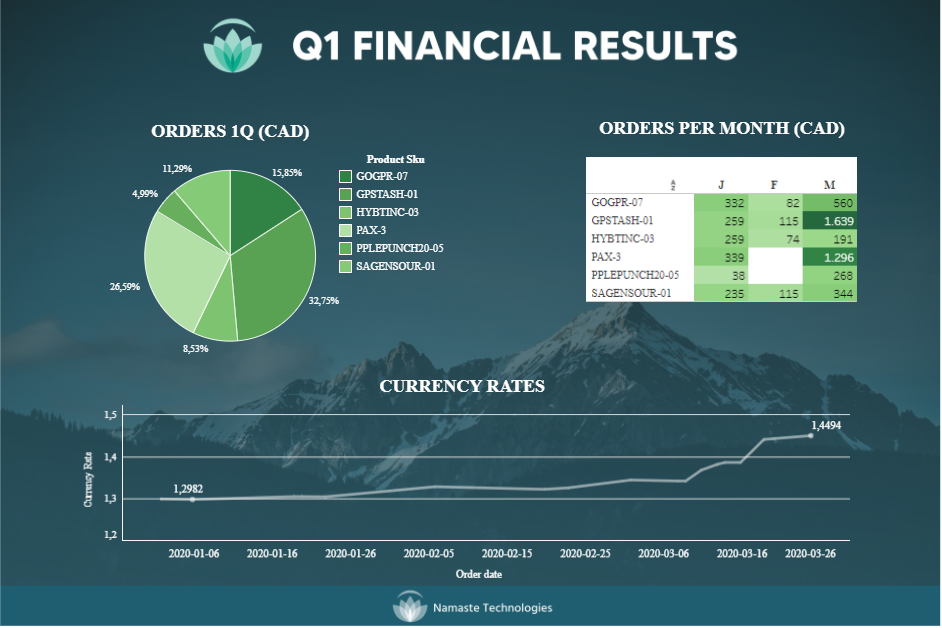




### Considerations:

*   I went to the Namaste website and took the color pattern to use on my dashboard. I used this site https://color.adobe.com/pt/create/color-wheel to identify the colors.

    COLOR 1: #1ca7a5 \
    COLOR 2: #2a6273 \
    COLOR 3: #1e4b58 \

<br />

*   I went to the link below to take the background Mountain image (similar to the Namaste website). It has free images with high quality.

    https://www.pexels.com/pt-br/procurar/mountain/ 

<br />

*   To check if the sales growth in March made sense, I saw the industry report of Canada's sale, that is available in this link: https://www.headset.io/industry-reports/the-current-state-of-canadas-cannabis-2-0-products

<br />

*   As it is possible to see in the Industry report, in the 2020 first quarter, the sales have grown, mostly in March. This information supports my dashboard's analyzes because March was the best month in Namaste's information.

<br />

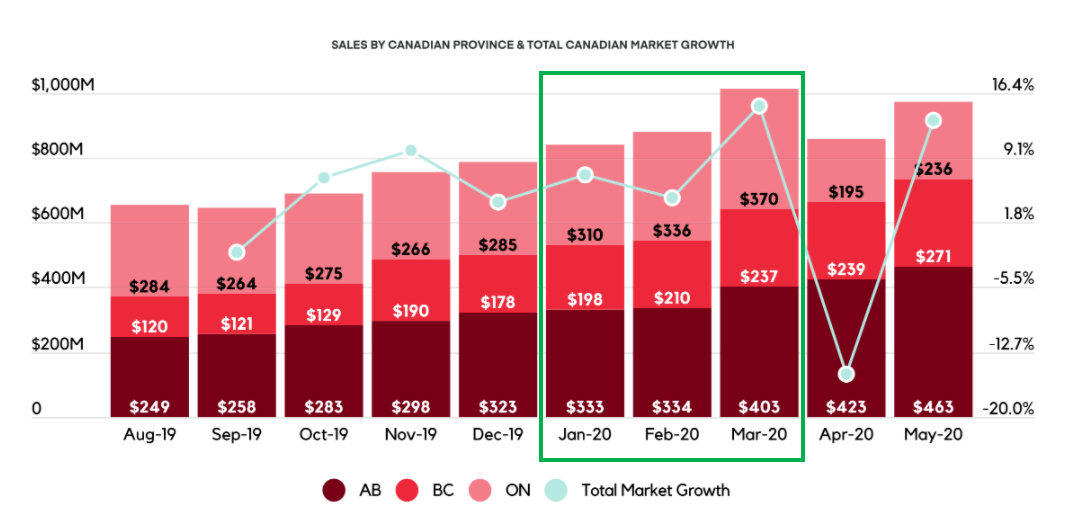